<a href="https://colab.research.google.com/github/Deepika-1605/Deepika/blob/main/LGM_VIP_Intern_Task_5_Stocks_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/NSE-TATAGLOBAL11.csv")
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


Text(0, 0.5, 'High')

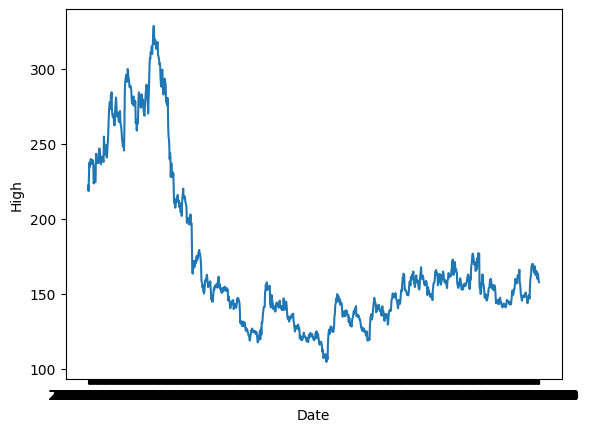

In [ ]:
plt.plot(data["Date"],data['High'])
plt.xlabel("Date")
plt.ylabel("High")

<Axes: xlabel='Date', ylabel='Turnover (Lacs)'>

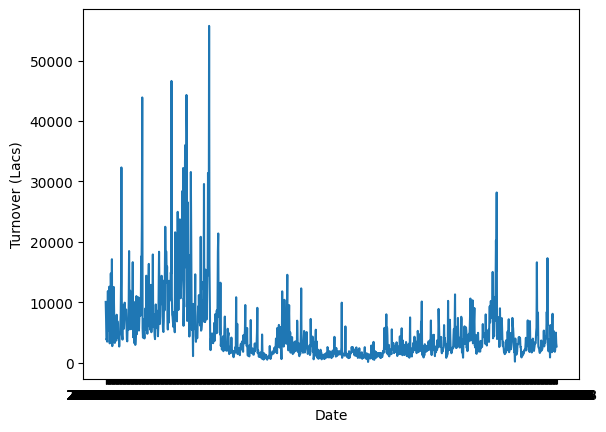

In [ ]:
sns.lineplot(x=data["Date"],y=data['Turnover (Lacs)'])

In [ ]:
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
train_size = int(len(scaled_data) * 0.75)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
def create_seq(data,seq_length):
    X = []
    Y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X),np.array(Y)

In [ ]:
seq_length = 20
X_train,Y_train = create_seq(train_data,seq_length)
X_test,Y_test = create_seq(test_data,seq_length)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (seq_length,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train,Y_train,epochs=50,batch_size=40)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0762
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0069
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0015
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0015
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0014
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0017
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013
Epoc

In [ ]:
train_loss = model.evaluate(X_train,Y_train,verbose = 0)
test_loss = model.evaluate(X_test,Y_test,verbose = 0)
print(f"Train Loss: {train_loss: .4f}")
print(f"Test Loss: {test_loss: .4f}")

Train Loss:  0.0007
Test Loss:  0.0004


In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
train_predictions = scale.inverse_transform(train_predictions)
test_predictions = scale.inverse_transform(test_predictions)

In [ ]:
print("Predicted Values for the Training Set: ")
print(train_predictions.flatten())

Predicted Values for the Training Set: 
[218.02843  217.63269  218.16576  221.6377   225.39432  229.08965
 231.76686  233.18822  234.41714  233.93271  233.64384  234.416
 236.44989  238.23688  238.82454  238.3729   236.90556  235.01215
 233.97377  233.32451  233.31616  234.03091  233.9768   233.7338
 233.53989  235.73442  237.6182   239.11502  239.43294  238.70874
 239.51906  240.12778  239.56554  237.45161  236.19308  237.43002
 238.61765  243.01433  249.37491  256.5592   263.85022  269.77106
 271.69635  272.33765  273.33374  274.8457   272.3746   269.79895
 266.29868  263.5216   261.97775  260.79984  259.66272  258.04562
 257.19656  258.26572  262.00717  265.4501   269.51498  271.08127
 270.7149   268.5187   266.6458   265.13376  263.745    262.2648
 259.29556  258.05383  259.1851   260.1472   259.4115   258.86417
 257.8284   256.07935  253.39346  250.14192  246.48053  243.70485
 242.45428  240.91899  240.01605  242.46443  252.86592  264.63007
 276.60696  285.6602   292.38956  294.55

In [ ]:
print("Predicted Values for the Testing Set: ")
print(test_predictions.flatten())

Predicted Values for the Testing Set: 
[146.88945 148.58884 150.42422 151.91376 153.5035  155.28616 157.25226
 158.99124 160.35124 160.70905 160.75499 160.55951 159.37666 157.71248
 156.47206 155.59691 155.09525 155.03242 155.45915 156.13403 156.15544
 155.69046 155.2893  155.33522 155.50618 156.201   157.1676  158.46512
 159.17029 159.08105 158.5444  157.6962  156.82492 156.37242 155.90456
 155.38239 154.78961 154.04938 153.19722 153.02779 153.41606 154.46172
 155.84457 157.04762 157.76686 158.11053 158.26813 158.22566 158.19724
 158.27301 159.06699 160.0601  161.98047 163.75421 164.62225 164.37857
 163.25145 163.04453 163.66722 164.27747 164.05602 163.87076 163.61412
 163.00352 162.31439 160.4487  158.48378 156.5234  154.35999 152.83427
 151.8235  151.63962 151.89662 152.63884 153.75383 154.60526 154.88347
 154.42621 153.50638 152.97255 152.32866 151.52632 151.28996 151.32738
 151.6737  152.25813 152.68262 152.85657 152.79312 152.93468 152.90053
 153.23236 153.73538 154.53677 155.443